In [1]:
import pandas as pd
import os
import warnings
import seaborn as sns 
import matplotlib.pyplot as plt 
import sys

# Filter out warnings
warnings.filterwarnings("ignore")

sys.path.append('../../')

from cool_train.data_loading import correct_column_types

# Additional time features
from cool_train.feature_engineering import add_time_features

In [2]:
%load_ext autoreload
%autoreload 2

# Load Dataset

In [3]:
trains_new_dataset = [107, 131, 136, 172, 181, 194]


dict_trains = {}

date_string = '20231207'

main_folder_path = '../../dataset/'

subfolders = [f.path for f in os.scandir(main_folder_path) if f.is_dir() and date_string in f.name and "tbl_AR41" in f.name]


for jj, subfolder in enumerate(subfolders):
    files = [f.path for f in os.scandir(subfolder) if f.is_file()]
    file_path = files[0]
    raw_data = pd.read_csv(file_path, sep=';')
    dict_trains[trains_new_dataset[jj]] = raw_data

In [4]:
# Chose one Train
df = dict_trains[136]

In [5]:
# Data Casting
df = correct_column_types(df)

# Remove useless columns
useless_cols = ['IsInvalidLine', 'IsTreated', 'ID_Org','id','vehicle_id','Insert_Datetime','mapped_veh_id_Org','Is_Meteo_Retrieved',
                'RS_E_RPM_Delta_Percent','RS_E_OilPress_Delta_Percent', 'RS_E_WatTemp_Delta_Percent','RS_E_InAirTemp_Delta_Percent','RS_T_OilTemp_Delta_Percent'] # Too much NaNs
                
df = df.drop(useless_cols, axis=1)

# Remove Out-of-Range values
df = df[df['OutOfRange_NB_PC1'] == 0]
df = df[df['OutOfRange_NB_PC2'] == 0]
df

,timestamps_UTC,lat,lon,temperature,elevation,precipitations,snow_height,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,...,Distance,IsMoving,MovingSpeed,Slope,VerticalDisplacement,RS_E_InAirTemp_Delta,RS_E_OilPress_Delta,RS_E_RPM_Delta,RS_E_WatTemp_Delta,RS_T_OilTemp_Delta
1594,2023-01-23 22:00:57,51.215928,4.421040,0.5545,19.0,0.0,0.01,0.0,0.0,0.0,...,67.569221,1.0,6.401295,0.147996,0.263158,0.0,0.0,0.0,0.0,0.0
1595,2023-01-23 22:00:59,51.216517,4.420929,0.6195,9.0,0.0,0.01,0.0,0.0,0.0,...,67.192465,1.0,120.946438,-0.148826,-5.000000,0.0,0.0,0.0,0.0,2.0
1596,2023-01-23 22:01:16,51.215910,4.421045,0.5545,19.0,0.0,0.01,0.0,0.0,0.0,...,67.192465,1.0,14.228993,0.148826,0.588235,0.0,0.0,0.0,0.0,1.0
1597,2023-01-23 22:01:19,51.216522,4.420893,0.6195,9.0,0.0,0.01,27.0,32.0,3.0,...,67.569221,1.0,81.083066,-0.147996,-3.333333,5.0,580.0,0.0,0.0,0.0
1598,2023-01-23 22:02:16,51.215882,4.421020,0.5545,19.0,0.0,0.01,35.0,40.0,3.0,...,67.366615,1.0,4.254734,0.148441,0.175439,5.0,576.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374972,2023-09-13 21:45:47,50.936613,5.306404,18.2260,38.0,0.0,0.00,21.0,47.0,0.0,...,54.643010,1.0,10.928602,0.000000,0.000000,26.0,6.0,0.0,41.0,43.0
374973,2023-09-13 21:46:28,50.936764,5.305734,18.2260,38.0,0.0,0.00,21.0,47.0,0.0,...,52.087506,1.0,4.573537,0.000000,0.000000,26.0,6.0,0.0,41.0,43.0
374974,2023-09-13 21:46:47,50.936577,5.306441,18.2260,38.0,0.0,0.00,21.0,47.0,0.0,...,54.643010,1.0,10.353412,0.000000,0.000000,26.0,6.0,0.0,41.0,42.0
374975,2023-09-13 21:47:29,50.936786,5.305697,18.2260,38.0,0.0,0.00,21.0,48.0,0.0,...,56.575591,1.0,4.849336,0.000000,0.000000,27.0,6.0,0.0,41.0,43.0


In [6]:
# Drop NaNs
original_rows = len(df)
df_cleaned = df.dropna()
rows_removed = original_rows - len(df_cleaned)
print(f"Number of NaNs rows removed: {rows_removed}")

Number of NaNs rows removed: 0


In [7]:
# Uniform Median-Resampling
df_cleaned = df_cleaned.set_index('timestamps_UTC')
df_cleaned = df_cleaned.resample('1t').median()

# Drop the segments where there is no data
df_cleaned = df_cleaned.dropna(how='all')
df_cleaned 

,lat,lon,temperature,elevation,precipitations,snow_height,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,...,Distance,IsMoving,MovingSpeed,Slope,VerticalDisplacement,RS_E_InAirTemp_Delta,RS_E_OilPress_Delta,RS_E_RPM_Delta,RS_E_WatTemp_Delta,RS_T_OilTemp_Delta
timestamps_UTC,,,,,,,,,,,,,,,,,,,,,
2023-01-23 22:00:00,51.216223,4.420985,0.587,14.0,0.0,0.01,0.0,0.0,0.0,0.0,...,67.380843,1.0,63.673866,-0.000415,-2.368421,0.0,0.0,0.0,0.0,1.0
2023-01-23 22:01:00,51.216216,4.420969,0.587,14.0,0.0,0.01,13.5,16.0,1.5,291.5,...,67.380843,1.0,47.656029,0.000415,-1.372549,2.5,290.0,0.0,0.0,0.5
2023-01-23 22:02:00,51.216195,4.420958,0.587,14.0,0.0,0.01,35.5,40.0,3.0,579.0,...,67.321291,1.0,42.492948,-0.000100,-1.578947,4.5,576.0,0.0,0.0,1.5
2023-01-23 22:03:00,51.216225,4.420945,0.587,14.0,0.0,0.01,41.0,45.0,3.0,583.0,...,73.071970,1.0,49.357083,0.010751,-1.580460,4.0,580.0,0.0,0.5,0.5
2023-01-23 22:04:00,51.216225,4.420958,0.587,14.0,0.0,0.01,0.0,0.0,0.0,0.0,...,72.667503,1.0,12.862125,-0.010933,-0.316667,0.0,0.0,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-13 21:43:00,50.936693,5.306081,18.226,38.0,0.0,0.00,21.0,45.0,0.0,6.0,...,50.843283,1.0,7.982589,0.000000,0.000000,24.0,6.0,0.0,42.5,43.0
2023-09-13 21:44:00,50.936696,5.306052,18.226,38.0,0.0,0.00,21.0,46.0,0.0,6.0,...,53.365258,1.0,7.700868,0.000000,0.000000,25.0,6.0,0.0,42.0,44.0
2023-09-13 21:45:00,50.936696,5.306047,18.226,38.0,0.0,0.00,21.0,47.0,0.0,6.0,...,54.322378,1.0,7.724839,0.000000,0.000000,26.0,6.0,0.0,41.0,42.5


In [8]:
# Adding the Time-Based Features
df_cleaned['timestamps_UTC'] = df_cleaned.index 
df_time = add_time_features(df_cleaned)
df_time = df_time.drop('timestamps_UTC',axis=1 )
df_time 

,lat,lon,temperature,elevation,precipitations,snow_height,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,...,RS_E_InAirTemp_Delta,RS_E_OilPress_Delta,RS_E_RPM_Delta,RS_E_WatTemp_Delta,RS_T_OilTemp_Delta,month,hour,dayOfWeek,quarter,timeOfDay
timestamps_UTC,,,,,,,,,,,,,,,,,,,,,
2023-01-23 22:00:00,51.216223,4.420985,0.587,14.0,0.0,0.01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,23,0,1,3
2023-01-23 22:01:00,51.216216,4.420969,0.587,14.0,0.0,0.01,13.5,16.0,1.5,291.5,...,2.5,290.0,0.0,0.0,0.5,1,23,0,1,3
2023-01-23 22:02:00,51.216195,4.420958,0.587,14.0,0.0,0.01,35.5,40.0,3.0,579.0,...,4.5,576.0,0.0,0.0,1.5,1,23,0,1,3
2023-01-23 22:03:00,51.216225,4.420945,0.587,14.0,0.0,0.01,41.0,45.0,3.0,583.0,...,4.0,580.0,0.0,0.5,0.5,1,23,0,1,3
2023-01-23 22:04:00,51.216225,4.420958,0.587,14.0,0.0,0.01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,1,23,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-13 21:43:00,50.936693,5.306081,18.226,38.0,0.0,0.00,21.0,45.0,0.0,6.0,...,24.0,6.0,0.0,42.5,43.0,9,23,2,3,3
2023-09-13 21:44:00,50.936696,5.306052,18.226,38.0,0.0,0.00,21.0,46.0,0.0,6.0,...,25.0,6.0,0.0,42.0,44.0,9,23,2,3,3
2023-09-13 21:45:00,50.936696,5.306047,18.226,38.0,0.0,0.00,21.0,47.0,0.0,6.0,...,26.0,6.0,0.0,41.0,42.5,9,23,2,3,3


In [9]:
# Add Regimes
from cool_train.feature_engineering import create_regimes

df_time = create_regimes(df_time)
df_time

,lat,lon,temperature,elevation,precipitations,snow_height,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,...,RS_E_OilPress_Delta,RS_E_RPM_Delta,RS_E_WatTemp_Delta,RS_T_OilTemp_Delta,month,hour,dayOfWeek,quarter,timeOfDay,Regime
timestamps_UTC,,,,,,,,,,,,,,,,,,,,,
2023-01-23 22:00:00,51.216223,4.420985,0.587,14.0,0.0,0.01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,23,0,1,3,Stopped
2023-01-23 22:01:00,51.216216,4.420969,0.587,14.0,0.0,0.01,13.5,16.0,1.5,291.5,...,290.0,0.0,0.0,0.5,1,23,0,1,3,Stopped
2023-01-23 22:02:00,51.216195,4.420958,0.587,14.0,0.0,0.01,35.5,40.0,3.0,579.0,...,576.0,0.0,0.0,1.5,1,23,0,1,3,Stopped
2023-01-23 22:03:00,51.216225,4.420945,0.587,14.0,0.0,0.01,41.0,45.0,3.0,583.0,...,580.0,0.0,0.5,0.5,1,23,0,1,3,Stopped
2023-01-23 22:04:00,51.216225,4.420958,0.587,14.0,0.0,0.01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.5,1,23,0,1,3,Stopped
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-13 21:43:00,50.936693,5.306081,18.226,38.0,0.0,0.00,21.0,45.0,0.0,6.0,...,6.0,0.0,42.5,43.0,9,23,2,3,3,Stopped
2023-09-13 21:44:00,50.936696,5.306052,18.226,38.0,0.0,0.00,21.0,46.0,0.0,6.0,...,6.0,0.0,42.0,44.0,9,23,2,3,3,Stopped
2023-09-13 21:45:00,50.936696,5.306047,18.226,38.0,0.0,0.00,21.0,47.0,0.0,6.0,...,6.0,0.0,41.0,42.5,9,23,2,3,3,Stopped


In [10]:
# Add useful feature 
df_time['InAirTemp_PC1_above'] = df_time['RS_E_InAirTemp_PC1'] - df_time['temperature']
df_time['InAirTemp_PC2_above'] = df_time['RS_E_InAirTemp_PC2'] - df_time['temperature']

In [11]:
df_time.to_csv('../../dataset/df_final_train136.csv')

# Testing different Anomaly Detection Methods

In [12]:
df_test = df_time.copy()
df = df_test.copy()

## STL Decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Seasonal-Trend decomposition using LOESS (STL) for anomaly detection
res = seasonal_decompose(df['temperature'], period=24)  # Assuming a daily seasonality
df['trend'] = res.trend
df['seasonal'] = res.seasonal
df['residual'] = res.resid
df['anomaly_stl'] = (df['residual'] > 2 * df['residual'].std()) | (df['residual'] < -2 * df['residual'].std())


# Isolation Forest

In [ ]:
df.columns 

In [ ]:
from sklearn.ensemble import IsolationForest


# Isolation Forest for anomaly detection
model_iforest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly_iforest'] = model_iforest.fit_predict(df[['temperature','RS_E_InAirTemp_PC1', 'RS_E_OilPress_PC1', 'lat', 'lon']])

# Visualize Results

In [ ]:
# Visualize anomalies
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['temperature'], label='Temperature')
plt.scatter(df[df['anomaly_iforest'] == -1].index, df[df['anomaly_iforest'] == -1]['temperature'], color='red', label='Isolation Forest Anomalies')
plt.scatter(df[df['anomaly_stl']].index, df[df['anomaly_stl']]['temperature'], color='orange', label='STL Anomalies')
plt.title('Temperature Time Series with Anomalies')
plt.legend()
plt.show()

## K-means Clustering

In [ ]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm # not available on Kaggle Kernel
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [ ]:
df_time.columns

In [ ]:
# Take useful feature and standardize them
df_time['InAirTemp_PC1_above'] = df_time['RS_E_InAirTemp_PC1'] - df_time['temperature']
df_time['InAirTemp_PC2_above'] = df_time['RS_E_InAirTemp_PC2'] - df_time['temperature']
interesting_features = [
       'InAirTemp_PC1_above','InAirTemp_PC2_above','elevation',
       'RS_E_OilPress_PC1', 'RS_E_OilPress_PC2', 'RS_E_RPM_PC1',
       'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1', 'RS_E_WatTemp_PC2',
       'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2', 'MovingSpeed', 'Slope', 'VerticalDisplacement',
       'RS_E_InAirTemp_Delta', 'RS_E_OilPress_Delta', 'RS_E_RPM_Delta',
       'RS_E_WatTemp_Delta', 'RS_T_OilTemp_Delta', 'month', 'hour',
       'dayOfWeek', 'quarter', 'timeOfDay']

data = df_time[interesting_features]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# reduce to 3 importants features
pca = PCA(n_components=3)
data = pca.fit_transform(data)

# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
data

In [ ]:
# calculate with different number of centroids to see the loss plot (elbow method)
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [ ]:
df_time['cluster'] = kmeans[14].predict(data)
df_time['principal_feature1'] = data[0]
df_time['principal_feature2'] = data[1]

In [ ]:
df_time['cluster'] = kmeans[14].predict(data)
data[0].index = df_time.index
data[1].index = df_time.index
data[2].index = df_time.index
df_time['principal_feature1'] = data[0]
df_time['principal_feature2'] = data[1]
df_time['principal_feature3'] = data[2]
df_time['cluster'].value_counts()

In [ ]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey'}
ax.scatter(df_time['principal_feature1'], df_time['principal_feature3'], c=df_time["cluster"].apply(lambda x: colors[x]))
plt.show()

In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min

principal_features = df_time[['principal_feature1','principal_feature2','principal_feature3']]

# Get centroids
centroids = kmeans[14].cluster_centers_

# Calculate distances to the nearest centroid for each data point
df_time['DistanceToNearestCentroid'] = pairwise_distances_argmin_min(principal_features, centroids)[1]

#Set a threshold for anomaly detection (e.g., consider top 5% as anomalies)
threshold_percentile = 95
threshold_distance = pd.Series(df_time['DistanceToNearestCentroid']).quantile(threshold_percentile / 100)

# Identify anomalies based on the threshold distance
anomalies = df_time[df_time['DistanceToNearestCentroid'] > threshold_distance]

# Display or further analyze the anomalies
df_time['anomalies'] = df_time['DistanceToNearestCentroid'] > threshold_distance
df_time['anomalies'] 

In [ ]:
df_time['RS_E_RPM_PC1']

In [ ]:
import plotly.express as px 

# Set the timeframe for one month (adjust as needed)
start_date = '2023-01-29'
end_date = '2023-03-01'

# Filter data for one month
df_one_month = df_time[(df_time.index >= start_date) & (df_time.index < end_date)]

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create an interactive time series plot with anomalies highlighted
fig = px.line(df_one_month, x=df_one_month.index, y='RS_E_RPM_PC1', title='Time Series with Anomalies (One Month)',
              labels={'YourFeature': 'Your Feature'}, line_shape='linear')

# Highlight anomalies
anomalies_fig = px.scatter(df_one_month[df_one_month['anomalies']], x=df_one_month[df_one_month['anomalies']].index,
                           y='RS_E_RPM_PC1', title='Anomalies', labels={'RS_E_RPM_PC1': 'Your Feature'},
                           color='anomalies', color_discrete_map={True: 'red'}, hover_data=['anomalies'])

# Add anomalies trace to the main figure
fig.add_trace(anomalies_fig.data[0])

# Show the plot
fig.show()

Conclusion: It doesnt seem to work very good. 
- Big block of anomalies detected in 29/01. 
- Sparse anomlaies everywhere
- Too much anomalies

We need to know more what type of anomalies we want to detect (in a graph). 

For example, 
- When the difference between Temp_air and Temp is strange
- When is PRess_Delta is abnormal
- RPM1 vs RPM2 -> pattern not seen before
- Pressue is unusually low compared to the standard

In [ ]:
df_time 

# Multiple Anomaly detection for each sensor
Build separate anomaly detection models for each sensor and for each  combine their outputs to identify anomalies.

In [ ]:
# Build columns that make sense
df_time.columns 

In [ ]:
feats_IF = ['RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2',
       'RS_E_OilPress_PC1', 'RS_E_OilPress_PC2', 'RS_E_RPM_PC1',
       'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1', 'RS_E_WatTemp_PC2',
       'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2', 
       'RS_E_InAirTemp_Delta', 'RS_E_OilPress_Delta', 'RS_E_RPM_Delta',
       'RS_E_WatTemp_Delta', 'RS_T_OilTemp_Delta', 'month', 'hour',
       'dayOfWeek', 'quarter', 'timeOfDay', 'InAirTemp_PC1_above',
       'InAirTemp_PC2_above','Regime']

In [ ]:
train_data_full = df_time[feats_IF]

In [ ]:
Regime = 'Cruising'

train_data_full = train_data_full[train_data_full['Regime'] ==Regime ]
train_data_full = train_data_full.drop('Regime', axis=1)
train_data = train_data_full.iloc[0:10000]
train_data

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


# Function to train an Isolation Forest model for each sensor
def train_isolation_forest_models(data):
    models = {}
    for sensor in data.columns:
        model = IsolationForest(contamination=0.05, random_state=42)
        model.fit(data[sensor].values.reshape(-1, 1))
        models[sensor] = model
    return models


# Function to train an LocalOutlierFactor model for each sensor
def train_lof_models(data):
    models = {}
    for sensor in data.columns:
        model = LocalOutlierFactor(contamination=0.05)
        model.fit(data[sensor].values.reshape(-1, 1))
        models[sensor] = model
    return models


# Function to predict anomalies using the trained models
def predict_anomalies(models, data):
    anomalies = pd.DataFrame(index=data.index)
    for sensor, model in models.items():
        anomalies[sensor] = model.predict(data[sensor].values.reshape(-1, 1))
    return anomalies


In [ ]:
# Train Isolation Forest models for each sensor

# Train Isolation Forest models for each sensor within each regime
models = train_isolation_forest_models(train_data)

# Predict anomalies
anomaly_predictions = predict_anomalies(models, train_data)


In [ ]:
# Choose the feature for which you want to detect anomalies
selected_feature = 'RS_E_InAirTemp_PC2'

# Create a Plotly figure with anomalies highlighted
fig = px.line(train_data, x=train_data.index, y=selected_feature, title=f"{selected_feature} with Anomalies")
fig.add_scatter(x=train_data.index[anomaly_predictions[selected_feature] == -1],
                y=train_data[selected_feature][anomaly_predictions[selected_feature] == -1],
                mode='markers', marker=dict(color='red', size=8), name='Anomaly')
fig.show()

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import plotly.graph_objects as go
import plotly.express as px

selected_feature = 'RS_E_InAirTemp_PC1'

In [ ]:
# Normalize the data
mean = train_data[selected_feature].mean()
std = train_data[selected_feature].std()
train_data['normalized_oil_temperature'] = (train_data[selected_feature] - mean) / std

# Create sequences for training the AutoEncoder
sequence_length = 10
sequences = [train_data['normalized_oil_temperature'].values[i:i + sequence_length] for i in range(len(train_data) - sequence_length + 1)]
sequences = np.array(sequences)


In [ ]:
# Build an AutoEncoder model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(sequence_length,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(sequence_length, activation='linear')
])

model.compile(optimizer='adam', loss='mse')

# Train the AutoEncoder
model.fit(sequences, sequences, epochs=50, batch_size=32)

In [ ]:
# Predict the reconstruction errors
reconstructions = model.predict(sequences)
mse = np.mean(np.power(sequences - reconstructions, 2), axis=1)

# Identify anomalies based on the reconstruction errors
threshold = 0.3
anomalies = train_data[sequence_length - 1:][mse > threshold]

In [ ]:
# Visualize the time series and anomalies using Plotly
fig = go.Figure()

# Time series plot
fig.add_trace(go.Scatter(x=train_data.index, y=train_data[selected_feature], mode='lines', name='Oil Temperature'))
# Anomalies plot
fig.add_trace(go.Scatter(x=anomalies.index, y=anomalies[selected_feature],
                         mode='markers', marker=dict(color='red', size=8), name='Anomaly'))

# Layout settings
fig.update_layout(title=f'{selected_feature} Time Series with Anomalies (AutoEncoder)',
                  xaxis_title='Time',
                  yaxis_title=f'{selected_feature}',
                  legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
                  showlegend=True)

# Show the plot
fig.show()

In [ ]:
anomalies

# RNN

In [ ]:
train_data

In [ ]:
selected_feature = 'RS_E_WatTemp_PC1'

In [ ]:
# Normalize the data
mean = train_data[selected_feature].mean()
std = train_data[selected_feature].std()
train_data['normalized_sensor_values'] = (train_data[selected_feature] - mean) / std

# Create sequences for training the LSTM AutoEncoder
sequence_length = 10
sequences = [train_data['normalized_sensor_values'].values[i:i + sequence_length] for i in range(len(train_data) - sequence_length + 1)]
sequences = np.array(sequences)

# Build an LSTM AutoEncoder model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(sequence_length, 1)),
    tf.keras.layers.LSTM(8, activation='relu', return_sequences=True, dropout=0.2),
    tf.keras.layers.LSTM(4, activation='relu', return_sequences=False),
    tf.keras.layers.RepeatVector(sequence_length),
    tf.keras.layers.LSTM(4, activation='relu', return_sequences=True),
    tf.keras.layers.LSTM(8, activation='relu', return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation='linear'))
])

model.compile(optimizer='adam', loss='mse')

# Reshape sequences for LSTM input
sequences = sequences.reshape(sequences.shape[0], sequences.shape[1], 1)

# Train the LSTM AutoEncoder
model.fit(sequences, sequences, epochs=30, batch_size=32)

# Predict the reconstruction errors
reconstructions = model.predict(sequences)
mse = np.mean(np.power(sequences - reconstructions, 2), axis=1)

# Identify anomalies based on the reconstruction errors
threshold = 2
anomalies = train_data[sequence_length - 1:][mse > threshold]

# Visualize the time series and anomalies using Plotly
fig = go.Figure()

# Time series plot
fig.add_trace(go.Scatter(x=train_data.index, y=train_data[selected_feature], mode='lines', name=selected_feature))
# Anomalies plot
fig.add_trace(go.Scatter(x=anomalies.index, y=anomalies[selected_feature],
                         mode='markers', marker=dict(color='red', size=8), name='Anomaly'))

# Layout settings
fig.update_layout(title=f'{selected_feature} Time Series with Anomalies (LSTM AutoEncoder)',
                  xaxis_title='Time',
                  yaxis_title=selected_feature,
                  legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
                  showlegend=True)

# Show the plot
fig.show()

# Check for patterns in all features

In [ ]:
feats_IF

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming you have a DataFrame 'df' with columns 'timestamp', 'variable1', 'variable2', ...
# You should replace this with your actual data loading procedure

for column in feats_IF:
    

    # Plot autocorrelation and partial autocorrelation
    fig, axes = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(train_data[column], lags=50, ax=axes[0], title=column)
    plot_pacf(train_data[column], lags=50, ax=axes[1], title=column)
    plt.show()
plt.tight_layout()

## STL Decomposition

In [ ]:
from statsmodels.tsa.seasonal import STL

for column in feats_IF:

    # Perform seasonal decomposition
    stl = STL(train_data[column])  # Adjust seasonal parameter based on your data
    result = stl.fit()

    # Plot the decomposed components
    result.plot()
    plt.show()


--> Cannot use STL as the time series has gaps

In [ ]:
train_data.index 

In [363]:
df.set

,timestamps_UTC,lat,lon,temperature,elevation,precipitations,snow_height,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,...,IsMoving,MovingSpeed,Slope,VerticalDisplacement,RS_E_InAirTemp_Delta,RS_E_OilPress_Delta,RS_E_RPM_Delta,RS_E_WatTemp_Delta,RS_T_OilTemp_Delta,anomalies
1594,2023-01-23 22:00:57,51.215928,4.421040,0.5545,19.0,0.0,0.01,0.0,0.0,0.0,...,1.0,6.401295,0.147996,0.263158,0.0,0.0,0.0,0.0,0.0,NaN
1595,2023-01-23 22:00:59,51.216517,4.420929,0.6195,9.0,0.0,0.01,0.0,0.0,0.0,...,1.0,120.946438,-0.148826,-5.000000,0.0,0.0,0.0,0.0,2.0,NaN
1596,2023-01-23 22:01:16,51.215910,4.421045,0.5545,19.0,0.0,0.01,0.0,0.0,0.0,...,1.0,14.228993,0.148826,0.588235,0.0,0.0,0.0,0.0,1.0,NaN
1597,2023-01-23 22:01:19,51.216522,4.420893,0.6195,9.0,0.0,0.01,27.0,32.0,3.0,...,1.0,81.083066,-0.147996,-3.333333,5.0,580.0,0.0,0.0,0.0,NaN
1598,2023-01-23 22:02:16,51.215882,4.421020,0.5545,19.0,0.0,0.01,35.0,40.0,3.0,...,1.0,4.254734,0.148441,0.175439,5.0,576.0,0.0,0.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374972,2023-09-13 21:45:47,50.936613,5.306404,18.2260,38.0,0.0,0.00,21.0,47.0,0.0,...,1.0,10.928602,0.000000,0.000000,26.0,6.0,0.0,41.0,43.0,NaN
374973,2023-09-13 21:46:28,50.936764,5.305734,18.2260,38.0,0.0,0.00,21.0,47.0,0.0,...,1.0,4.573537,0.000000,0.000000,26.0,6.0,0.0,41.0,43.0,NaN
374974,2023-09-13 21:46:47,50.936577,5.306441,18.2260,38.0,0.0,0.00,21.0,47.0,0.0,...,1.0,10.353412,0.000000,0.000000,26.0,6.0,0.0,41.0,42.0,NaN
374975,2023-09-13 21:47:29,50.936786,5.305697,18.2260,38.0,0.0,0.00,21.0,48.0,0.0,...,1.0,4.849336,0.000000,0.000000,27.0,6.0,0.0,41.0,43.0,NaN


In [6]:

# Convert 'timestamp' to datetime index
df['timestamp'] = pd.to_datetime(df['timestamps_UTC'])
df.set_index('timestamp', inplace=True)

# Calculate time differences between consecutive timestamps using shift
time_diff = df.index.to_series().diff()

# Determine when a new time series should start
gap_threshold = pd.Timedelta(minutes=30)
new_series_mask = time_diff > gap_threshold

# Create a new series identifier based on the cumulative sum of the mask
series_identifier = new_series_mask.cumsum()

# Separate the data into different dataframes based on the identified time series
dataframes_by_series = {series: group for series, group in df.groupby(series_identifier)}

# Filter out time series with fewer than 1000 points

# Resample each valid dataframe to 1-minute frequency and interpolate
resampled_dataframes = {}
for series, data in dataframes_by_series.items():
    resampled_data = data.resample('1T').median()
    resampled_data = resampled_data.interpolate(method='linear')
    resampled_dataframes[series] = resampled_data
    
    
filtered_dataframes = {series: data for series, data in resampled_dataframes.items() if len(data) >= 60} #in minutes


# Example: Accessing the first resampled series
first_resampled_series = filtered_dataframes[next(iter(filtered_dataframes))]

# Display the first resampled series
first_resampled_series

,id,vehicle_id,lat,lon,elevation,Sensors_NB_Fail_PC1,Sensors_NB_Fail_PC2,OutOfRange_NB_PC1,OutOfRange_NB_PC2,IsInvalidLine,IsTreated,ID_Org,mapped_veh_id_Org,IsMoving,Is_Meteo_Retrieved
timestamp,,,,,,,,,,,,,,,
2023-01-23 08:26:00,3462971.0,136.0,51.038378,5.280001,37.0,0.0,0.0,0.0,1.0,0.0,1.0,3421874.0,136.0,0.0,1.0
2023-01-23 08:27:00,7090263.0,136.0,51.038391,5.279761,37.0,0.0,0.0,0.0,1.0,0.0,1.0,7063663.0,136.0,0.0,1.0
2023-01-23 08:28:00,1737269.5,136.0,51.039788,5.265717,35.0,0.0,0.0,0.0,1.0,0.0,1.0,1906599.5,136.0,0.5,1.0
2023-01-23 08:29:00,7282812.0,136.0,51.047337,5.243465,33.0,0.0,0.0,0.0,1.0,0.0,1.0,7245499.0,136.0,1.0,1.0
2023-01-23 08:30:00,11403272.5,136.0,51.050429,5.236176,46.5,0.0,0.0,0.0,1.0,0.0,1.0,11454049.5,136.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-25 00:34:00,9227610.5,136.0,51.190509,5.112066,27.5,0.0,0.0,0.0,0.0,0.0,1.0,9116742.0,136.0,1.0,1.0
2023-01-25 00:35:00,15138927.5,136.0,51.190516,5.112060,27.5,0.0,0.0,0.0,0.0,0.0,1.0,15265528.0,136.0,1.0,1.0
2023-01-25 00:36:00,6816676.5,136.0,51.190501,5.112052,27.5,0.0,0.0,0.0,0.0,0.0,1.0,6990529.0,136.0,1.0,1.0


In [9]:
filtered_dataframes[0]

,id,vehicle_id,lat,lon,elevation,Sensors_NB_Fail_PC1,Sensors_NB_Fail_PC2,OutOfRange_NB_PC1,OutOfRange_NB_PC2,IsInvalidLine,IsTreated,ID_Org,mapped_veh_id_Org,IsMoving,Is_Meteo_Retrieved
timestamp,,,,,,,,,,,,,,,
2023-01-23 08:26:00,3462971.0,136.0,51.038378,5.280001,37.0,0.0,0.0,0.0,1.0,0.0,1.0,3421874.0,136.0,0.0,1.0
2023-01-23 08:27:00,7090263.0,136.0,51.038391,5.279761,37.0,0.0,0.0,0.0,1.0,0.0,1.0,7063663.0,136.0,0.0,1.0
2023-01-23 08:28:00,1737269.5,136.0,51.039788,5.265717,35.0,0.0,0.0,0.0,1.0,0.0,1.0,1906599.5,136.0,0.5,1.0
2023-01-23 08:29:00,7282812.0,136.0,51.047337,5.243465,33.0,0.0,0.0,0.0,1.0,0.0,1.0,7245499.0,136.0,1.0,1.0
2023-01-23 08:30:00,11403272.5,136.0,51.050429,5.236176,46.5,0.0,0.0,0.0,1.0,0.0,1.0,11454049.5,136.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-25 00:34:00,9227610.5,136.0,51.190509,5.112066,27.5,0.0,0.0,0.0,0.0,0.0,1.0,9116742.0,136.0,1.0,1.0
2023-01-25 00:35:00,15138927.5,136.0,51.190516,5.112060,27.5,0.0,0.0,0.0,0.0,0.0,1.0,15265528.0,136.0,1.0,1.0
2023-01-25 00:36:00,6816676.5,136.0,51.190501,5.112052,27.5,0.0,0.0,0.0,0.0,0.0,1.0,6990529.0,136.0,1.0,1.0


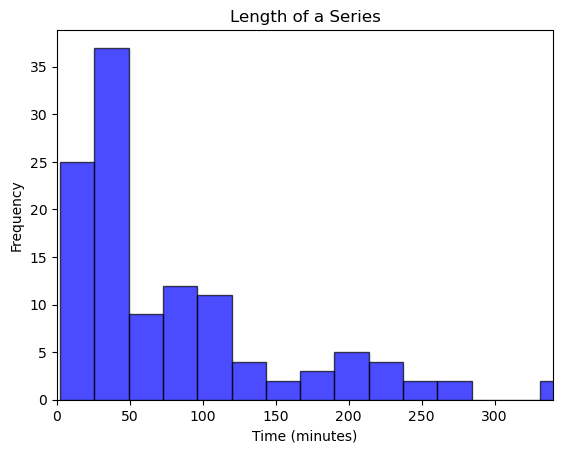

In [394]:
data_hours = [value / 60 for value in ll]


# Create a histogram
plt.hist(ll, bins=400, alpha=0.7, color='blue', edgecolor='black')


# Add labels and title
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.title('Length of a Series')

# Show the plot
plt.show()

# Prediction Model

In [124]:
# Case Regime = Cruising
select_regime_flag = True  
if select_regime_flag:
    df_time_regime = df_time[df_time['Regime'] == 'Cruising']
else:
    df_time_regime = df_time 
df_time_regime = df_time_regime.iloc[10000:30000]

In [125]:
# Train-Test Splitting
# Select the first 80% of samples for training
train_size = int(0.8 * len(df_time_regime))
train_data = df_time_regime.iloc[:train_size]

# Select the remaining 20% for testing
test_data = df_time_regime.iloc[train_size:]

In [126]:
# Split into input and target features
input_features = ['temperature','elevation','precipitations','snow_height','Distance', 
                'IsMoving', 'MovingSpeed', 'Slope', 'VerticalDisplacement','month', 'hour',
                'dayOfWeek', 'quarter', 'timeOfDay', 'RS_E_RPM_PC1', 'RS_E_RPM_PC2']


output_features = ['RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2']

X_train = train_data[input_features]
y_train = train_data[output_features]

X_test = test_data[input_features]
y_test = test_data[output_features]

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)


In [128]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [129]:
# Make predictions
y_pred = model.predict(X_test)

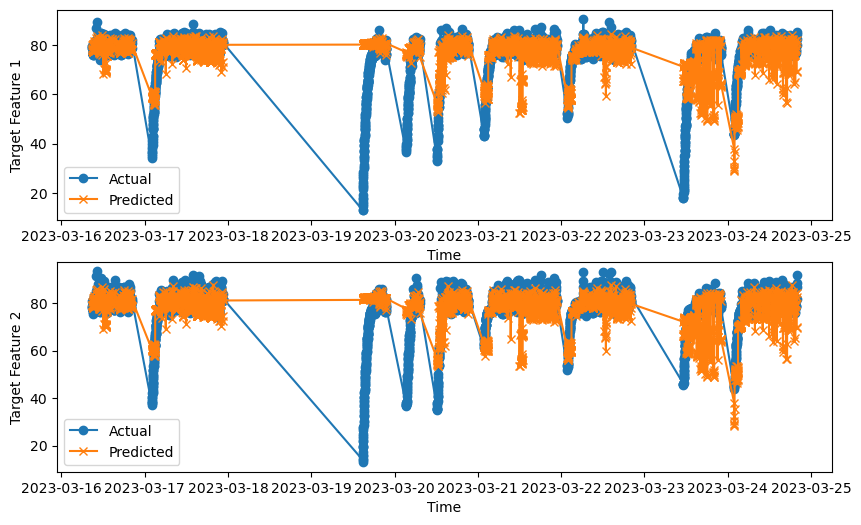

In [130]:
# Visualize predictions and anomalies
plt.figure(figsize=(10, 6))

# Plot actual vs. predicted values for target_feature1
plt.subplot(2, 1, 1)
plt.plot(test_data.index, y_test[output_features[0]], label='Actual', marker='o')
plt.plot(test_data.index, y_pred[:, 0], label='Predicted', marker='x')
plt.xlabel('Time')
plt.ylabel('Target Feature 1')
plt.legend()

# Plot actual vs. predicted values for target_feature2
plt.subplot(2, 1, 2)
plt.plot(test_data.index, y_test[output_features[1]], label='Actual', marker='o')
plt.plot(test_data.index, y_pred[:, 1], label='Predicted', marker='x')
plt.xlabel('Time')
plt.ylabel('Target Feature 2')
plt.legend()

Normalized Accuracy for Target Feature 1: 1.1910532582367928
Normalized Accuracy for Target Feature 2: 1.0890354783690974


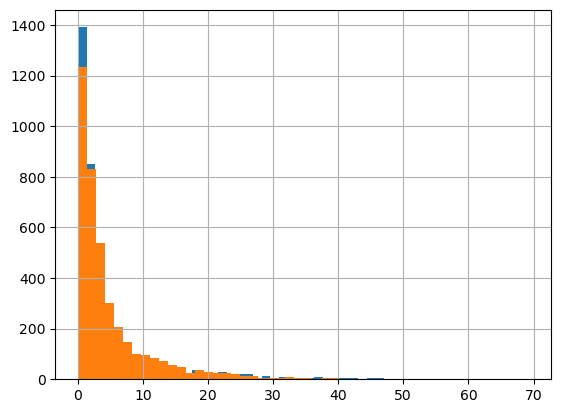

In [131]:
from sklearn.metrics import mean_squared_error
import numpy as np 
from scipy.stats import norm

def calculate_normalized_accuracy(actual, predicted):
    """
    Calculate the normalized Mean Squared Error (MSE) as a measure of accuracy.
    Normalized by dividing MSE by the range of the target feature.
    """
    range_target = np.max(actual) - np.min(actual)
    mse = mean_squared_error(actual, predicted)
    normalized_accuracy = mse / range_target # (range_target**2)  # Square the range to ensure the result is between 0 and 1
    return normalized_accuracy

def calculate_prediction_interval(predictions, std_dev, alpha=0.2):
    """
    Calculate the prediction interval around predicted values.
    """
    z_value = norm.ppf(1 - alpha / 2)
    lower_bound = predictions - z_value * std_dev
    upper_bound = predictions + z_value * std_dev
    return lower_bound, upper_bound

def detect_anomalies(actual, predicted, threshold=12.0):
    """
    Detect anomalies based on residuals (difference between actual and predicted values).
    Anomalies are points where the absolute residual is greater than the threshold.
    """
    residuals = np.abs(actual - predicted)
    anomalies_mask = residuals > threshold
    residuals.hist(bins=50)
    return anomalies_mask


# Calculate normalized accuracy
normalized_accuracy_feature1 = calculate_normalized_accuracy(y_test[output_features[0]], y_pred[:, 0])
normalized_accuracy_feature2 = calculate_normalized_accuracy(y_test[output_features[1]], y_pred[:, 1])

print(f"Normalized Accuracy for Target Feature 1: {normalized_accuracy_feature1}")
print(f"Normalized Accuracy for Target Feature 2: {normalized_accuracy_feature2}")

# Detect anomalies
anomalies_feature1 = detect_anomalies(y_test[output_features[0]], y_pred[:, 0])
anomalies_feature2 = detect_anomalies(y_test[output_features[1]], y_pred[:, 1])


In [132]:
import plotly.graph_objects as go


# Create Plotly figures for each target feature
fig1 = go.Figure()
fig2 = go.Figure()

# Plot actual values
fig1.add_trace(go.Scatter(x=test_data.index, y=y_test[output_features[0]], mode='lines+markers', name='Actual'))
fig2.add_trace(go.Scatter(x=test_data.index, y=y_test[output_features[1]], mode='lines+markers', name='Actual'))

# Plot predicted values and prediction interval
fig1.add_trace(go.Scatter(x=test_data.index, y=y_pred[:, 0], mode='lines', name='Predicted'))
fig1.add_trace(go.Scatter(x=test_data.index[anomalies_feature1], y=y_test[output_features[0]][anomalies_feature1],
                          mode='markers', name='Anomalies', marker=dict(color='red', size=10)))

fig2.add_trace(go.Scatter(x=test_data.index, y=y_pred[:, 1], mode='lines', name='Predicted'))
fig2.add_trace(go.Scatter(x=test_data.index[anomalies_feature2], y=y_test[output_features[1]][anomalies_feature2],
                          mode='markers', name='Anomalies', marker=dict(color='red', size=10)))

# Update layout
fig1.update_layout(title=f'Actual vs. Predicted for Target Feature: {output_features[0]}', xaxis_title='Time', yaxis_title=output_features[0])
fig2.update_layout(title=f'Actual vs. Predicted for Target Feature: {output_features[1]}', xaxis_title='Time', yaxis_title=output_features[1])

# Show the figures
fig1.show()
fig2.show()


In [147]:
def normalized_mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    variance = np.var(y_true)
    n_mse = mse / variance
    return n_mse

def coefficient_of_variation(y_true, y_pred):
    mean_true = np.mean(y_true)
    std_true = np.std(y_true)
    cv = std_true / mean_true
    normalized_metric = np.mean((y_true - y_pred)**2) / (mean_true**2 * cv**2)
    return normalized_metric

def mean_abs_value_norm(y_true, y_pred):
    range_max = 100
    abs_val = range_max - np.abs(y_true - y_pred)
    return np.mean(abs_val/range_max)

my_metric(y_test[output_features[0]],y_pred[:,0])
# coefficient_of_variation(y_test[output_features[1]],y_pred[:,1])

0.9486222610416594

# Compare different models

In [184]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

import numpy as np

# Function to create lag features for time series data with a specified number of timesteps
def create_lag_features(data, lag_values, target_variable):
    lagged_data = data.copy()

    for lag in lag_values:
        lagged_data[f'{target_variable}_lag_{lag}'] = lagged_data[target_variable].shift(lag)

    return lagged_data.dropna()

# Function to train and evaluate models using time-based cross-validation
def time_based_cross_validation(models, data, target_variable, metrics, cv_splits):
    results = []

    for model_name, model in models.items():
        print(f"\nTraining and evaluating {model_name} model...")
        model_results = {'Model': model_name}

        for metric_name, metric_func in metrics.items():
            metric_values = []
            for train_idx, test_idx in TimeSeriesSplit(n_splits=cv_splits).split(data):
                train_data, test_data = data.iloc[train_idx], data.iloc[test_idx]

                # Create lag features for both input features and target variable
                train_data_lagged = create_lag_features(train_data, lag_values=[1, 2, 3], target_variable=target_variable)
                test_data_lagged = create_lag_features(test_data, lag_values=[1, 2, 3], target_variable=target_variable)

                # Prepare input features and target variable
                X_train, y_train = train_data_lagged.drop(columns=[target_variable]), train_data_lagged[target_variable]
                X_test, y_test = test_data_lagged.drop(columns=[target_variable]), test_data_lagged[target_variable]

                model.fit(X_train, y_train)

                # Make predictions

                y_pred = model.predict(X_test)

                # Evaluate the model
                metric_value = metric_func(y_test, y_pred)
                metric_values.append(metric_value)

            # Save the average metric value for the model
            model_results[metric_name] = np.mean(metric_values)

        results.append(model_results)

    return pd.DataFrame(results)



# Define metrics (you can add more metrics as needed)
metrics = {'MeanSquaredError': mean_squared_error,
           'Coefficient_of_variation':coefficient_of_variation,
           'mean_abs_value_norm':mean_abs_value_norm,
           }

# Define models to compare
models_to_compare = {
    'LinearRegression': linear_reg_model,
    'RandomForest': random_forest_model,
}


In [185]:
input_features = ['temperature','elevation','precipitations','snow_height','Distance', 
                'IsMoving', 'MovingSpeed', 'Slope', 'VerticalDisplacement','month', 'hour',
                'dayOfWeek', 'quarter', 'timeOfDay', 'RS_E_RPM_PC1', 'RS_E_RPM_PC2','RS_T_OilTemp_PC1']

# Run time-based cross-validation and get results
cv_results = time_based_cross_validation(models_to_compare, df_time[input_features].iloc[0:1000], 'RS_T_OilTemp_PC1', metrics, cv_splits=5)

# Display the summary dataframe
cv_results


Training and evaluating LinearRegression model...

Training and evaluating RandomForest model...

Training and evaluating LSTM model...


ValueError: cannot reshape array of size 3173 into shape (167,16,1)